In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
import numpy as np
import csv

H_data_a = pd.read_csv('../data/h_cross_a.txt',sep=r'\s+')
H_data_t = pd.read_csv('../data/h_cross_t.txt',sep=r'\s+')
H_data_s = pd.read_csv('../data/h_cross_s.txt',sep=r'\s+')

O_data_a = pd.read_csv('../data/o_cross_a.txt',sep=r'\s+')
O_data_t = pd.read_csv('../data/o_cross_t.txt',sep=r'\s+')
O_data_s = pd.read_csv('../data/o_cross_s.txt',sep=r'\s+')

/tmp/ipykernel_84890/3574617377.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


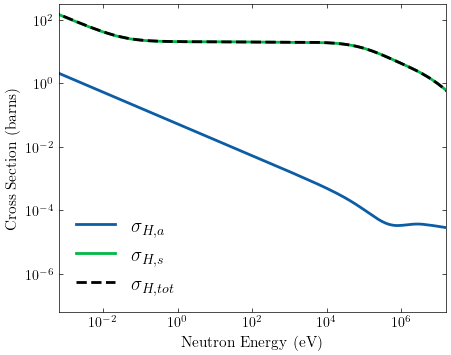

In [16]:
plt.figure(figsize=(5, 4))
plt.loglog(H_data_a["energy(eV)"], H_data_a["sigma_a(b)"], linewidth=2, label=r"$\sigma_{H,a}$")
plt.loglog(H_data_s["energy(eV)"], H_data_s["sigma_s(b)"], linestyle="-", linewidth=2, label=r"$\sigma_{H,s}$")
plt.loglog(H_data_t["energy(eV)"], H_data_t["sigma_t(b)"], linestyle="--", linewidth=2, color="k", label=r"$\sigma_{H,tot}$")
plt.xlabel(r"$\text{Neutron Energy (eV)}$", fontsize=11)
plt.ylabel(r"$\text{Cross Section (barns)}$", fontsize=11)
plt.legend(loc="lower left", fontsize=14)
plt.xlim(10**-3.2, 10**7.2)
plt.ylim(10**-7.2, 10**2.5)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#plt.title(r"Hydrogen Cross Sections at $T=300K$", fontsize=18, pad=18, loc = 'left')
plt.savefig("../data/H_cross.png")
plt.show()

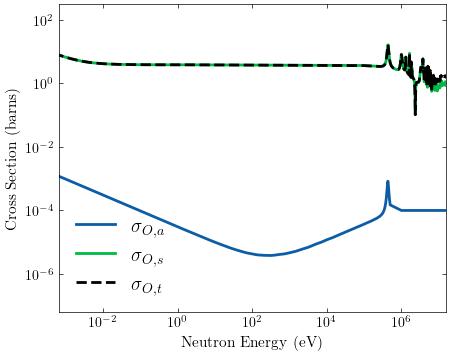

In [22]:
plt.figure(figsize=(5, 4))
plt.loglog(O_data_a["energy(eV)"], O_data_a["sigma_a(b)"], linewidth=2, label=r"$\sigma_{O,a}$")
plt.loglog(O_data_s["energy(eV)"], O_data_s["sigma_s(b)"], linestyle="-", linewidth=2, label=r"$\sigma_{O,s}$")
plt.loglog(O_data_t["energy(eV)"], O_data_t["sigma_t(b)"], linestyle="--", linewidth=2, color="k", label=r"$\sigma_{O,t}$")
plt.xlabel(r"$\text{Neutron Energy (eV)}$", fontsize=11)
plt.ylabel(r"$\text{Cross Section (barns)}$", fontsize=11)
plt.legend(loc="lower left", fontsize=14)
plt.xlim(10**-3.2, 10**7.2)
plt.ylim(10**-7.2, 10**2.5)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#plt.title(r"Oxygen Cross Sections at $T=300K$", fontsize=18, pad=18, loc = 'left')
plt.savefig("../data/O_cross.png")
plt.show()

In [4]:
def index_closest(data: pd.DataFrame, val: float, n: int) -> list:
    """
    Get indices of the n values closest to a given value.
    """
    df_sort = data.iloc[(data-val).abs().argsort()[:n]]
    return df_sort.index.tolist()

def find_closest(data1: pd.DataFrame, data2: pd.DataFrame, range: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Get the closest values of data1 to the values in the given range and the corresponding values 
    of data2.
    """
    x, y = [], []
    for val in range:
        i = index_closest(data1, val, 1)[0]
        x.append(data1[i])
        y.append(data2[i])
    return np.array(x), np.array(y)

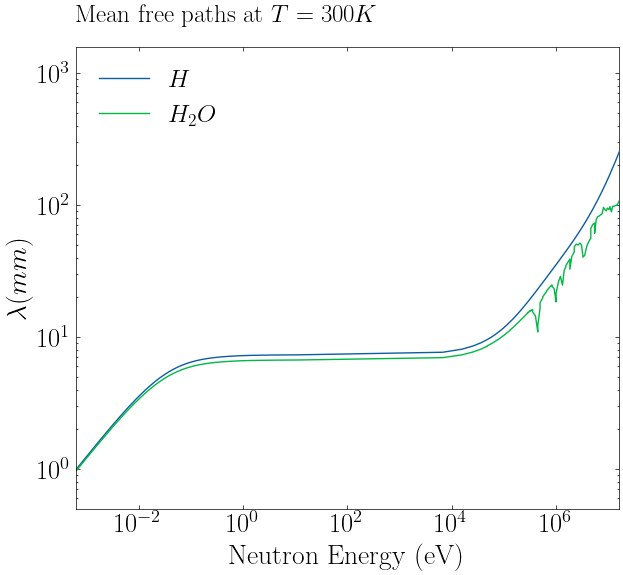

In [5]:
rho = 997 #kg/m^3
M = 0.01801528 #kg/mol
N_A =6.02214076*10**23 #mol^-1
n = rho *N_A / M # kg/m^3 * 1/mol * mol/kg = m^-3 
 
energy_range = np.logspace(-5, 8, 500, endpoint=True)


plt.figure(figsize=(7 ,6))

# ONLY H ATOMS
energies, cross_sections_H = find_closest(H_data_t["energy(eV)"], H_data_t["sigma_t(b)"], energy_range)
cross_sections_H = cross_sections_H*10**(-28) # convert barns -> m^2
mean_free_paths_H = 1/(2*cross_sections_H*n) # 1 / (m^2 * m^-3) = m
plt.loglog(energies, mean_free_paths_H*1000, label = "$H$") # m -> mm

# H2O
energies, cross_sections_O = find_closest(O_data_t["energy(eV)"], O_data_t["sigma_t(b)"], energy_range)
energies, cross_sections_H = find_closest(H_data_t["energy(eV)"], H_data_t["sigma_t(b)"], energy_range)
cross_sections_H = cross_sections_H*10**(-28) # convert barns -> m^2
cross_sections_O = cross_sections_O*10**(-28) # convert barns -> m^2
mean_free_paths_H2O = 1/ (n*(2*cross_sections_H + cross_sections_O)) # (1 / m^2) * m^-3) = m
plt.loglog(energies, mean_free_paths_H2O*1000, label = "$H_2O$") # m -> mm


# Save H2O mean free path data
with open("../data/mean_free_path.csv", "w") as f:
    write = csv.writer(f)
    df = pd.DataFrame({"Energy(eV)": energies ,"lambda(m)": mean_free_paths_H2O})
    df.to_csv("../data/mean_free_path.csv", index=False)


plt.xlabel("Neutron Energy (eV)", fontsize=20)
plt.ylabel("$\lambda(mm)$", fontsize=20)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.legend(fontsize=18, loc = "upper left")
plt.xlim(10**-3.2, 10**7.2)
plt.ylim(10**-0.3, 10**3.2)
plt.title(r"Mean free paths at $T=300K$", fontsize=18, pad=18, loc = 'left')
plt.savefig("../data/free_path.pdf")
plt.show()